<font color='lightblue' size=6>Practice 1: Second part. Implementation and evaluation with value iteration rule</font>

**Javier Gonález Barreda**

Recall from theory slides the scenario with no determinism transitions.

In [1]:
import numpy as np
state = [0,1,2,3,4]
action = [0,1,2] # left, staying, right movements
T = np.array([[[1/2,1/2,0,0,0],[1/2,1/2,0,0,0],[2/3,1/3,0,0,0]],
              [[1/3,2/3,0,0,0],[1/4,1/2,1/4,0,0],[0,2/3,1/3,0,0]],
              [[0,1/3,2/3,0,0],[0,1/4,1/2,1/4,0],[0,0,2/3,1/3,0]],
              [[0,0,1/3,2/3,0],[0,0,1/4,1/2,1/4],[0,0,0,2/3,1/3]],
              [[0,0,0,1/3,2/3],[0,0,0,1/2,1/2],[0,0,0,1/2,1/2]]])
num_states = 5
num_actions = 3
gamma = 1/2
R = np.zeros(5)
R[4] = 1

<font color='brown' size=6> *Exercise* </font>

Write a function implementing the value iteration algorithm. The function must return the V\* array containing the optimal value for each state. With the above proposed values, the result should be:

[0.00833333 0.025      0.1        0.4        1.6       ]

In [2]:
"""
def value_iteration(T, num_states, num_actions, gamma, R, epsilon=1e-10):
    V = np.zeros(num_states)  # Initialize values to 0
    while True:
        delta = 0  # difference
        for s in range(num_states):
            v = V[s]
            max_q_value = float('-inf') # ensure that any valid Q-value encountered during the iteration process will be greater than the initialized value of max_q_value.
            for a in range(num_actions):
                q_value = R[s] + gamma * np.sum(T[s, a, :] * V)
                max_q_value = max(max_q_value, q_value)
            V[s] = max_q_value
            delta = max(delta, np.abs(v - V[s]))
        if delta < epsilon: # espsilon is the small positive number
            break
    return V

V = value_iteration(T, num_states, num_actions, gamma, R)
print(V)
"""
#[0.00833333 0.025      0.1        0.4        1.6       ]

"\ndef value_iteration(T, num_states, num_actions, gamma, R, epsilon=1e-10): \n    V = np.zeros(num_states)  # Initialize values to 0\n    while True:\n        delta = 0  # difference\n        for s in range(num_states):\n            v = V[s]\n            max_q_value = float('-inf') # ensure that any valid Q-value encountered during the iteration process will be greater than the initialized value of max_q_value.\n            for a in range(num_actions):\n                q_value = R[s] + gamma * np.sum(T[s, a, :] * V)\n                max_q_value = max(max_q_value, q_value)\n            V[s] = max_q_value\n            delta = max(delta, np.abs(v - V[s]))\n        if delta < epsilon: # espsilon is the small positive number\n            break\n    return V\n\nV = value_iteration(T, num_states, num_actions, gamma, R)\nprint(V)\n"

In [3]:
def value_iteration(T, num_states, num_actions, gamma, R, epsilon=1e-10):
    V = np.zeros(num_states)  # Initialize values to 0
    while True:
        delta = float('-inf')  # difference
        for s in range(num_states):
            v = V[s]
            V[s] = max(np.sum(T[s, :] * (R[s] + gamma * V), axis=1))
            delta = max(delta, np.abs(v - V[s]))
            #print(V)
        if delta < epsilon: # espsilon is the small positive number
            break
    return V

V = value_iteration(T, num_states, num_actions, gamma, R)
print(V)
#[0.00833333 0.025      0.1        0.4        1.6       ]

[0.00833333 0.025      0.1        0.4        1.6       ]


<font color='brown' size=6> *Exercise* </font>

Lets calculate now what is the optimum policy given this optimum values for the states.

First, write a function to calculate Q\*(s,a) from V\* for all state s and all action a. This function must return a (num_state, num_action) bidimensional array.

For this scenario. given V\* calculated with gamma = 0.5 the result should be:

[[0.00833333 0.00833333 0.00694444]

 [0.00972222 0.01979166 0.025     ]

 [0.0375     0.078125   0.1       ]

 [0.15       0.3125     0.4       ]

 [1.6        1.5        1.5       ]]


In [4]:
def QValueFromV(T, num_states, num_actions, gamma, R, V):
    Q = np.zeros((num_states, num_actions))  # Initialize Q-values to 0
    for s in range(num_states):
        for a in range(num_actions):
            Q[s, a] = R[s] + gamma * np.sum(T[s, a, :] * V)
    return Q

# Assuming you have the previous code for value iteration and V array
V = value_iteration(T, num_states, num_actions, gamma, R)
Q = QValueFromV(T, num_states, num_actions, gamma, R, V)
print(Q)

"""
[[0.00833333 0.00833333 0.00694444]

 [0.00972222 0.01979166 0.025     ]

 [0.0375     0.078125   0.1       ]

 [0.15       0.3125     0.4       ]

 [1.6        1.5        1.5       ]]
 """

[[0.00833333 0.00833333 0.00694444]
 [0.00972222 0.01979167 0.025     ]
 [0.0375     0.078125   0.1       ]
 [0.15       0.3125     0.4       ]
 [1.6        1.5        1.5       ]]


'\n[[0.00833333 0.00833333 0.00694444]\n\n [0.00972222 0.01979166 0.025     ]\n\n [0.0375     0.078125   0.1       ]\n\n [0.15       0.3125     0.4       ]\n\n [1.6        1.5        1.5       ]]\n '

<font color='brown' size=6> *Exercise* </font>

Now, calculate the optimum policy from Q*(s,a). Write a function for doing that. For the already proposed values the result should be:

[0. 2. 2. 2. 0.]

In [5]:
def OptimalPolicy(num_states,Q):
  optimal_policy = np.argmax(Q, axis=1)  # Choose the action with the highest Q-value for each state
  return optimal_policy

print(OptimalPolicy(num_states, Q))

[0 2 2 2 0]


<font color='brown' size=6> *Exercise* </font>

Let's do a graphical study about how the value of V\* changes as gamma changes too. First, import mapplotlib as you already did in the first part of this practice.
Remember to import matplotlib and put the size of the image as 7,4.

In [6]:
import matplotlib.pyplot as plt

Then, calculate and store V\* for the gamma values:

gamma = (0.1, 0.25, 0.5, 0,75, 0.9, 1)

Next, write matplotlib python code to show **this** plot (each line corresponds with the values of each state, from state 0 to state 4, in each of the gamma values proposed):

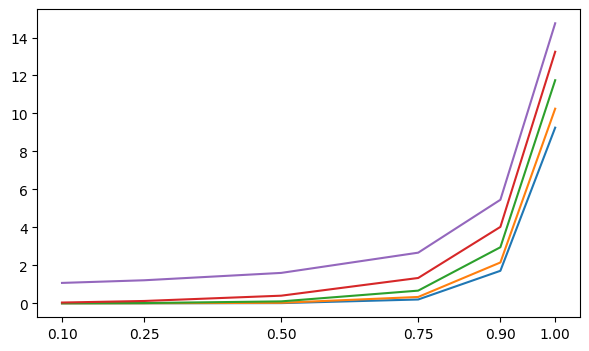




In [8]:
# Constants and data initialization
num_states = 5
num_actions = 3
state = np.arange(num_states)
gamma_values = [0.1, 0.25, 0.5, 0.75, 0.9, 1]

# Calculate and store V* for different gamma values
V_values = []
for gamma in gamma_values:
    V = value_iteration(T, num_states, num_actions, gamma, R)
    V_values.append(V)

# Plotting
plt.figure(figsize=(7, 4))

for i in range(num_states):
    plt.plot(gamma_values, [V[i] for V in V_values], label=f'State {i}')

plt.xlabel('Gamma')
plt.ylabel('Optimal Value (V*)')
plt.title('Optimal Value (V*) vs Gamma')
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: ignored

Explain in the next text cell what do you observe from this plot for this scenario

From the plotted graph showing the relationship between the optimal values V* and different discount factors gamma, several observations can be made:

1. **Impact of Gamma on Optimal Values:**
   - As gamma increases, the optimal values V* for all states tend to increase. This is because higher gamma values assign more importance to future rewards, encouraging the agent to consider long-term consequences and, consequently, increasing the value of states.

2. **Convergence to Immediate Reward (State 4):**
   - In this specific scenario, state 4 has an immediate reward of 1 and no future rewards. Therefore, when gamma is 1 (full consideration of future rewards), the optimal value of state 4 is 1. As gamma decreases, the optimal value for state 4 decreases because future rewards are discounted more, and the agent focuses more on immediate rewards.

3. **Effect on Intermediate States:**
   - Intermediate states (states 0 to 3) show similar patterns. Higher gamma values lead to higher optimal values for these states. As gamma decreases, the optimal values for these states decrease, indicating that the agent gives less importance to future rewards and focuses more on immediate rewards.

4. **Saturation Effect:**
   - Beyond a certain gamma value (around 0.75 in this plot), the optimal values appear to saturate, meaning they reach a point where further increases in gamma do not significantly impact the optimal values. This is because the influence of future rewards becomes dominant, and additional increases in gamma have diminishing effects on the optimal values.

In summary, the plot demonstrates how the choice of the discount factor gamma influences the optimal values assigned to states. Higher gamma values prioritize long-term rewards, leading to higher optimal values for all states, while lower gamma values focus more on immediate rewards, resulting in lower optimal values, especially for states with no immediate rewards. The plot provides valuable insights into the trade-off between immediate and future rewards in the agent's decision-making process.

Write here your thoughts